## cross joins me catersian product le rhe hai
## full-joins me 1. take all jo sb common hai,2. take all jo A me hai leking b me nhi , 3. take all jo b me hai lelin A me nhi

## cross-join

SELECT * FROM campusx.users1 t1
cross join campusx.groups t2

## INNER JOIN

SELECT * FROM campusx.users1 t1
inner join campusx.membership t2
on t1.user_id = t2.user_id


## LEFT JOIN
SELECT * FROM campusx.membership t1  # ye hai left table
left join campusx.users1 t2
on t1.user_id = t2.user_id


## RIGHT JOIN

SELECT * FROM campusx.membership t1 
right join campusx.users1 t2 # ye right table hai
on t1.user_id = t2.user_id


## full - outer joins --> dono ka sara value print krna hai
# note :- mysql me default full-outer join can not be possible

## but hm kr skte hai (left join + right join) ke bich union lagakr niche se dekh lo jo hai union ka matlab

SELECT * FROM campusx.membership t1  # ye hai left table
left join campusx.users1 t2
on t1.user_id = t2.user_id
union

SELECT * FROM campusx.membership t1 
right join campusx.users1 t2 # ye right table hai
on t1.user_id = t2.user_id

# UNION = isme duplicate value ko hta dete hai 2-table me se

SELECT * FROM campusx.person2
union
select * from campusx.person1


# UNION-ALL = isme sb aa jata hai including duplicates

SELECT * FROM campusx.person2
union all
select * from campusx.person1


# INTERsect = isme common value dono table ka aa jata hai

SELECT * FROM campusx.person2
intersect
select * from campusx.person1


# EXCEPT = isme minus wala logic hai jo set me hmlog use krte hai 1st-table me jo hai wo 2-nd me nhi hai
# aur jo 2-nd me hai wo 1st me nhi hai

SELECT * FROM campusx.person2
except
select * from campusx.person1

## order of sql-query execution

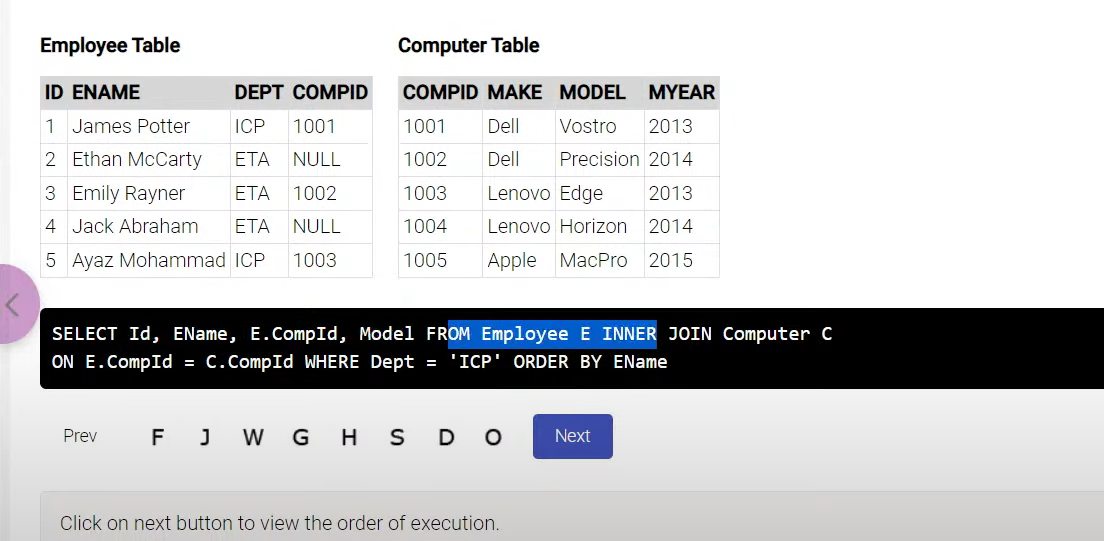

## self-join --> ak table ko khud hi ke sath join krne ko self-join bolte hai


select * from campusx.users1 t1
join campusx.users1 t2
on t1.emergency_contact = t2.user_id


## when you need to joins more than 1 column


SELECT * FROM campusx.students t1
join campusx.class t2
on t1.class_id = t2.class_id and t1.enrollment_year = t2.class_year


## joining more than 2 tables
## this query will give you all column of 3 tables but if you want can filter it
SELECT * FROM flipkart.order_details t1
join flipkart.orders t2
on t1.order_id = t2.order_id

join flipkart.users t3     
on t2.user_id = t3.user_id
 
## filtering some specific column

SELECT t1.order_id, t3.user_id , t2.order_id,t2.order_date FROM flipkart.order_details t1
join flipkart.orders t2
on t1.order_id = t2.order_id

join flipkart.users t3
on t2.user_id = t3.user_id
 
 

 ## find the order_id, name, city by joining users and orders

 SELECT t2.order_id,t1.name,t1.city
FROM flipkart.users t1
join flipkart.orders t2
on t1.user_id = t2.user_id



## find order_id,product category by joining order_details and category

SELECT t1.order_id ,t2.category
FROM flipkart.order_details t1
join flipkart.category t2
on t1.category_id = t2.category_id


## find all orders placed in pune

SELECT * FROM flipkart.users t1
join flipkart.orders t2
on t1.user_id = t2.user_id
where t1.city = 'pune'


## find all orders in chair category

SELECT * FROM flipkart.order_details t1
join flipkart.category t2
on t1.category_id = t2.category_id
where t2.vertical = 'chairs'


### practice question

## find all the profitable orders

SELECT t1.order_id , sum(t2.profit) as 'profit' FROM flipkart.orders t1
join flipkart.order_details t2
on t1.order_id = t2.order_id

group by t1.order_id 
having profit >0


## find the customer who has placed max number of orders


SELECT name,count(*) FROM flipkart.users t1
join flipkart.orders t2
on t1.user_id = t2.user_id
group by t1.name
order by count(*) desc limit 10;


## which is the most profitable category


SELECT t1.vertical ,sum(t2.profit) as 'profit' FROM flipkart.category t1
join flipkart.order_details t2
on t1.category_id = t2.category_id
group by t1.vertical
order by profit desc limit 1;



## which is the most profitable state


SELECT t1.state ,sum(t3.profit) as 'profit' FROM flipkart.users t1
join flipkart.orders t2
on t1.user_id = t2.user_id
join flipkart.order_details t3
on t2.order_id = t3.order_id
group by t1.state
order by profit desc limit 1;




## find all categories with profit higher than 5000


SELECT t1.vertical , sum(t2.profit) as 'profit' FROM flipkart.category t1
join flipkart.order_details t2
on t1.category_id = t2.category_id
group by t1.vertical
having profit >5000